In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("HeartDisease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
print("Jumlah data kosong : ")
print(df.isnull().sum())
print("Jumlah data duplikat : ",df.duplicated().sum())

Jumlah data kosong : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Jumlah data duplikat :  0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [11]:
# Mengisi nilai kosong dengan median dari masing-masing kolom numerik
df.fillna(df.median(), inplace=True)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
X = df.drop(columns=["num"])  # Semua fitur kecuali target
y = df["num"]  # Target klasifikasi

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [16]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC-ROC (binarizing the output for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
auc_roc = roc_auc_score(y_test_bin, y_pred_proba, average='weighted', multi_class='ovr')

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.6066
Precision: 0.5617
Recall: 0.6066
F1-Score: 0.5821
AUC-ROC: 0.8312


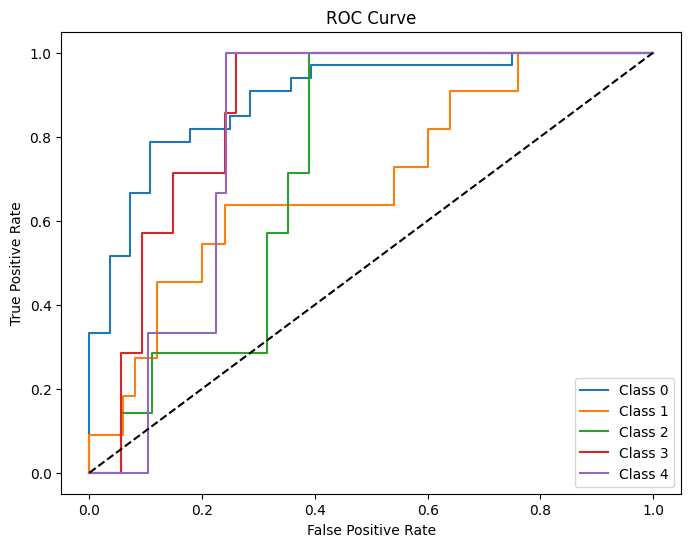

In [17]:
# ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(5):  # 5 classes (0-4)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Accuracy
Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

\[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]

Di mana:
- **TP (True Positive):** Prediksi positif yang benar.
- **TN (True Negative):** Prediksi negatif yang benar.
- **FP (False Positive):** Prediksi positif yang salah.
- **FN (False Negative):** Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.



## Precision
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:

\[ Precision = \frac{TP}{TP + FP} \]

Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.



## Recall
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:

\[ Recall = \frac{TP}{TP + FN} \]

Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.



## F1-Score
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:

\[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} \]

F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.



## AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

- **True Positive Rate (TPR) atau Recall:** \( TPR = \frac{TP}{TP + FN} \)
- **False Positive Rate (FPR):** \( FPR = \frac{FP}{FP + TN} \)

AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.
